Tugas: Implementasi Operasi Morfologi Citra

* 5025221058 - Muhammad Abdurrahman Faiz
* 5025231248 - Mufrih Fakhir
* 5025221044 - Wildan Fauzy Maulana Hasyim

## Bagian 1: Konsep Dasar

### 1.1 Konsep Dasar (Teori)

* **Himpunan Spasial:** Dalam citra biner, objek (foreground) direpresentasikan sebagai himpunan piksel bernilai 1 (atau 255), dan latar belakang (background) sebagai himpunan piksel bernilai 0.
* **Konektivitas:** Menentukan piksel mana yang dianggap "bertetangga".
    * **4-konektivitas:** Hanya tetangga horizontal dan vertikal.
    * **8-konektivitas:** Termasuk tetangga diagonal.
* **Structuring Element (SE):** Ini adalah *kernel* atau *mask* biner kecil yang digunakan untuk "menyentuh" citra. Titik pusat SE (disebut *origin*) digeser ke setiap piksel pada citra. Bentuk dan ukuran SE sangat menentukan hasil operasi.

## Bagian 2: Operasi Morfologi Dasar

### 2.1 Dilasi (Dilation)

**Teori:** Dilasi "menebalkan" atau "memperluas" area objek (foreground).  Operasi ini mengambil nilai piksel **maksimum** dari area yang ditutupi oleh SE. Pada citra biner, ini berarti jika *setidaknya satu* piksel di bawah SE adalah 1, maka piksel output di titik *origin* SE menjadi 1.

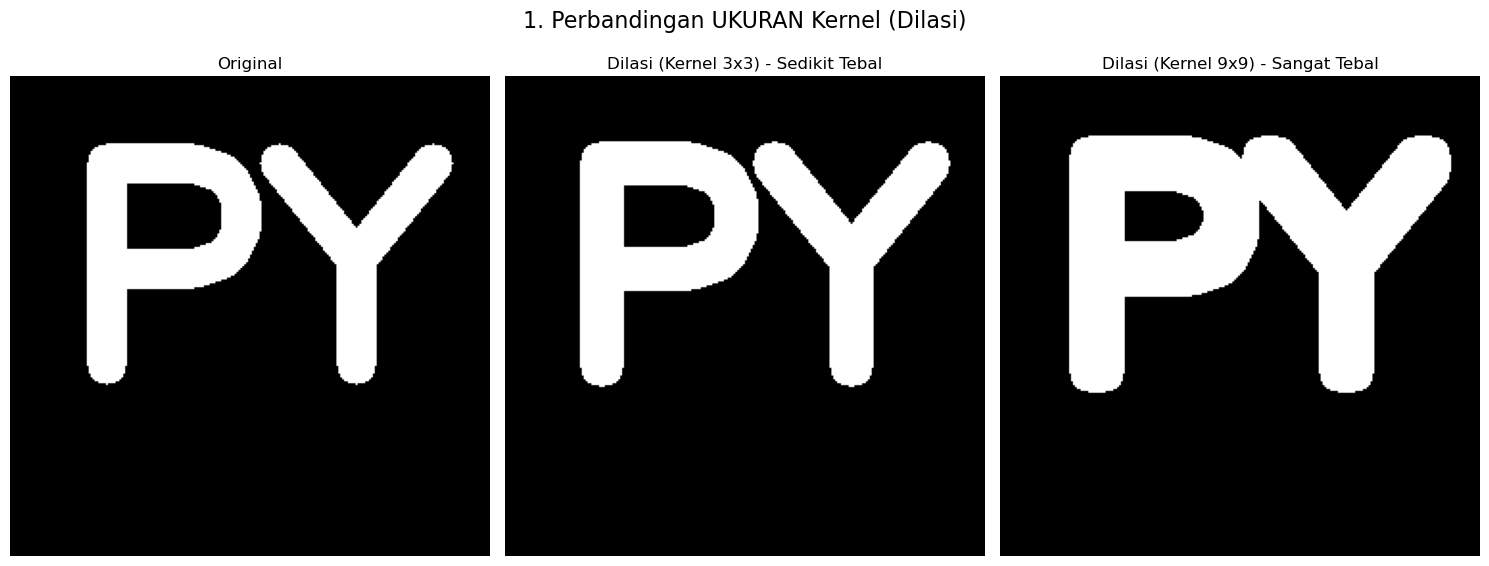

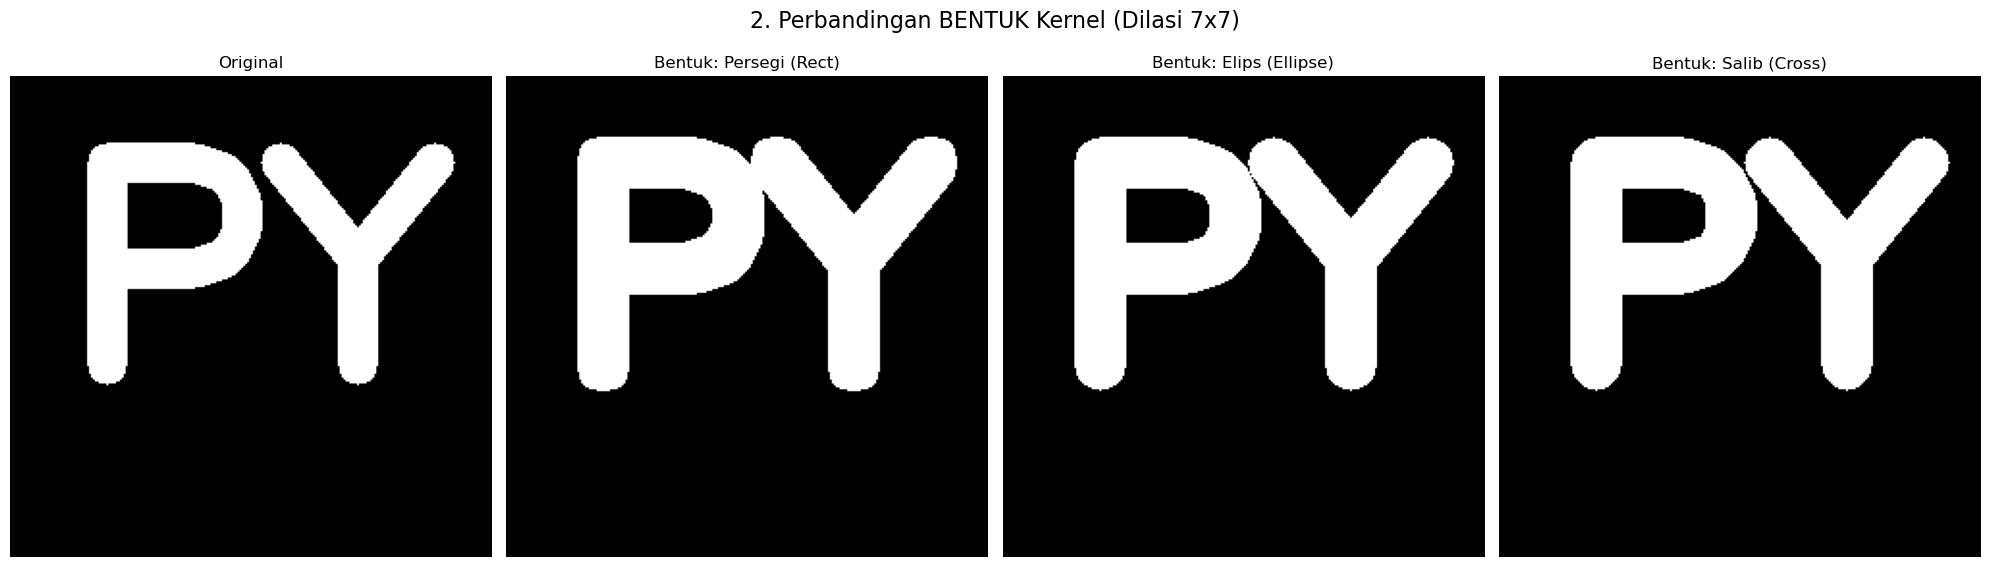

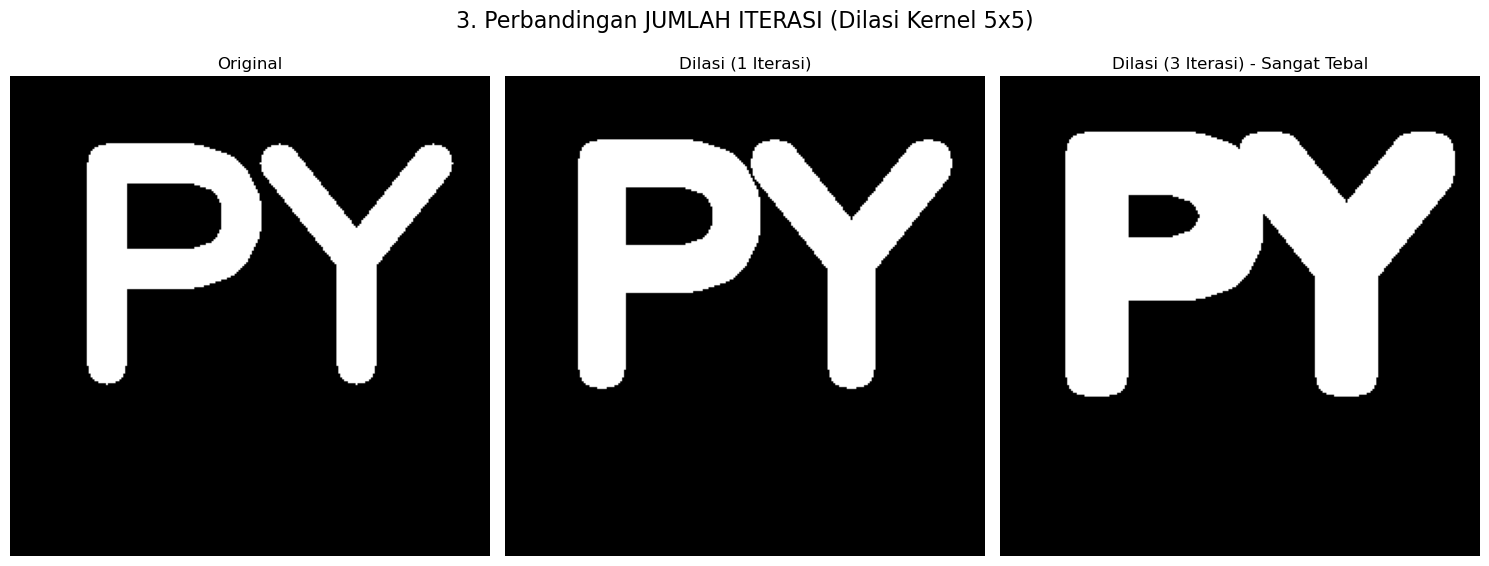

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = np.zeros((250, 250), dtype=np.uint8)

cv2.putText(img, "PY", (30, 150), cv2.FONT_HERSHEY_SIMPLEX, 5, (255), 20)
kernel_small = np.ones((3, 3), np.uint8)
dilation_small = cv2.dilate(img, kernel_small, iterations=1)

kernel_large = np.ones((9, 9), np.uint8)
dilation_large = cv2.dilate(img, kernel_large, iterations=1)

plt.figure(figsize=(15, 6))
plt.suptitle("1. Perbandingan UKURAN Kernel (Dilasi)", fontsize=16)

plt.subplot(1, 3, 1)
plt.title("Original")
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Dilasi (Kernel 3x3) - Sedikit Tebal")
plt.imshow(dilation_small, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("Dilasi (Kernel 9x9) - Sangat Tebal")
plt.imshow(dilation_large, cmap='gray')
plt.axis('off')

plt.tight_layout()

kernel_rect = cv2.getStructuringElement(cv2.MORPH_RECT, (7, 7))
dilation_rect = cv2.dilate(img, kernel_rect, iterations=1)

kernel_ellipse = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7, 7))
dilation_ellipse = cv2.dilate(img, kernel_ellipse, iterations=1)

kernel_cross = cv2.getStructuringElement(cv2.MORPH_CROSS, (7, 7))
dilation_cross = cv2.dilate(img, kernel_cross, iterations=1)

plt.figure(figsize=(20, 6))
plt.suptitle("2. Perbandingan BENTUK Kernel (Dilasi 7x7)", fontsize=16)

plt.subplot(1, 4, 1)
plt.title("Original")
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.title("Bentuk: Persegi (Rect)")
plt.imshow(dilation_rect, cmap='gray')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.title("Bentuk: Elips (Ellipse)")
plt.imshow(dilation_ellipse, cmap='gray')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.title("Bentuk: Salib (Cross)")
plt.imshow(dilation_cross, cmap='gray')
plt.axis('off')

plt.tight_layout()

kernel_5x5 = np.ones((5, 5), np.uint8)

dilation_1_iter = cv2.dilate(img, kernel_5x5, iterations=1)

dilation_3_iter = cv2.dilate(img, kernel_5x5, iterations=3)

plt.figure(figsize=(15, 6))
plt.suptitle("3. Perbandingan JUMLAH ITERASI (Dilasi Kernel 5x5)", fontsize=16)

plt.subplot(1, 3, 1)
plt.title("Original")
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Dilasi (1 Iterasi)")
plt.imshow(dilation_1_iter, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("Dilasi (3 Iterasi) - Sangat Tebal")
plt.imshow(dilation_3_iter, cmap='gray')
plt.axis('off')

plt.tight_layout()

plt.show()

### 2.2 Erosi (Erosion)

**Teori:** Erosi "mengikis" atau "menyusutkan" area objek.  Operasi ini mengambil nilai piksel **minimum** dari area yang ditutupi oleh SE. Pada citra biner, ini berarti *semua* piksel di bawah SE harus 1 agar piksel output di titik *origin* SE menjadi 1.

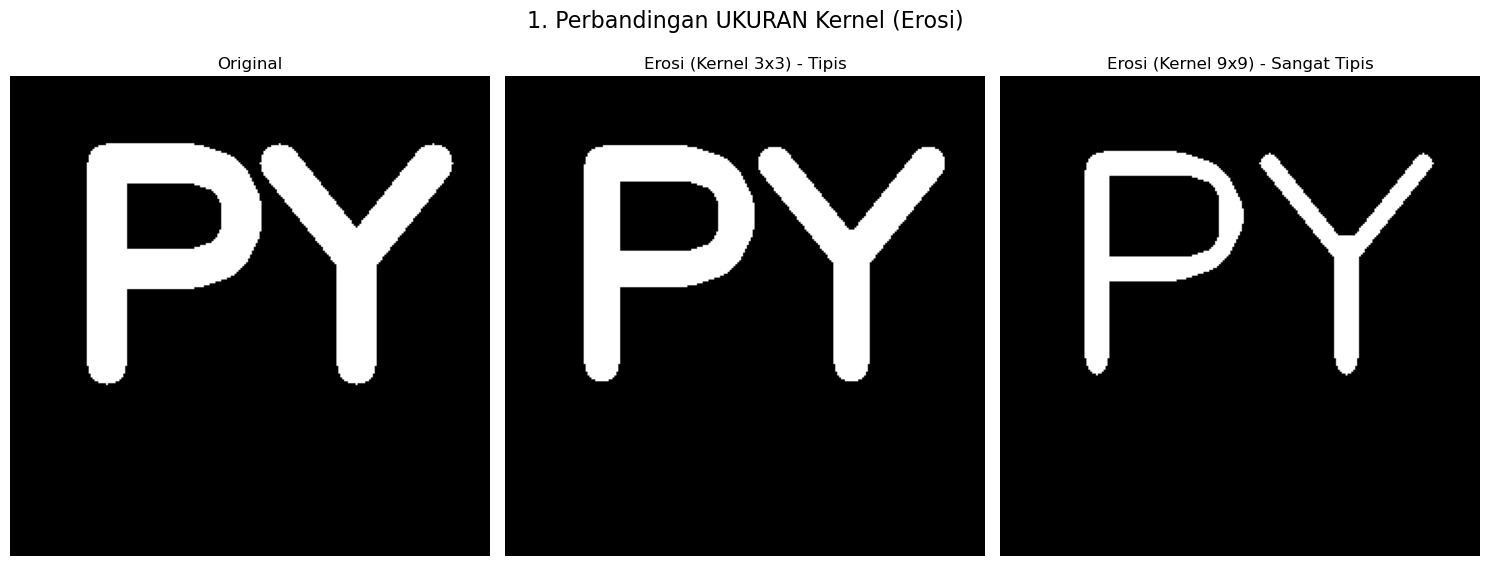

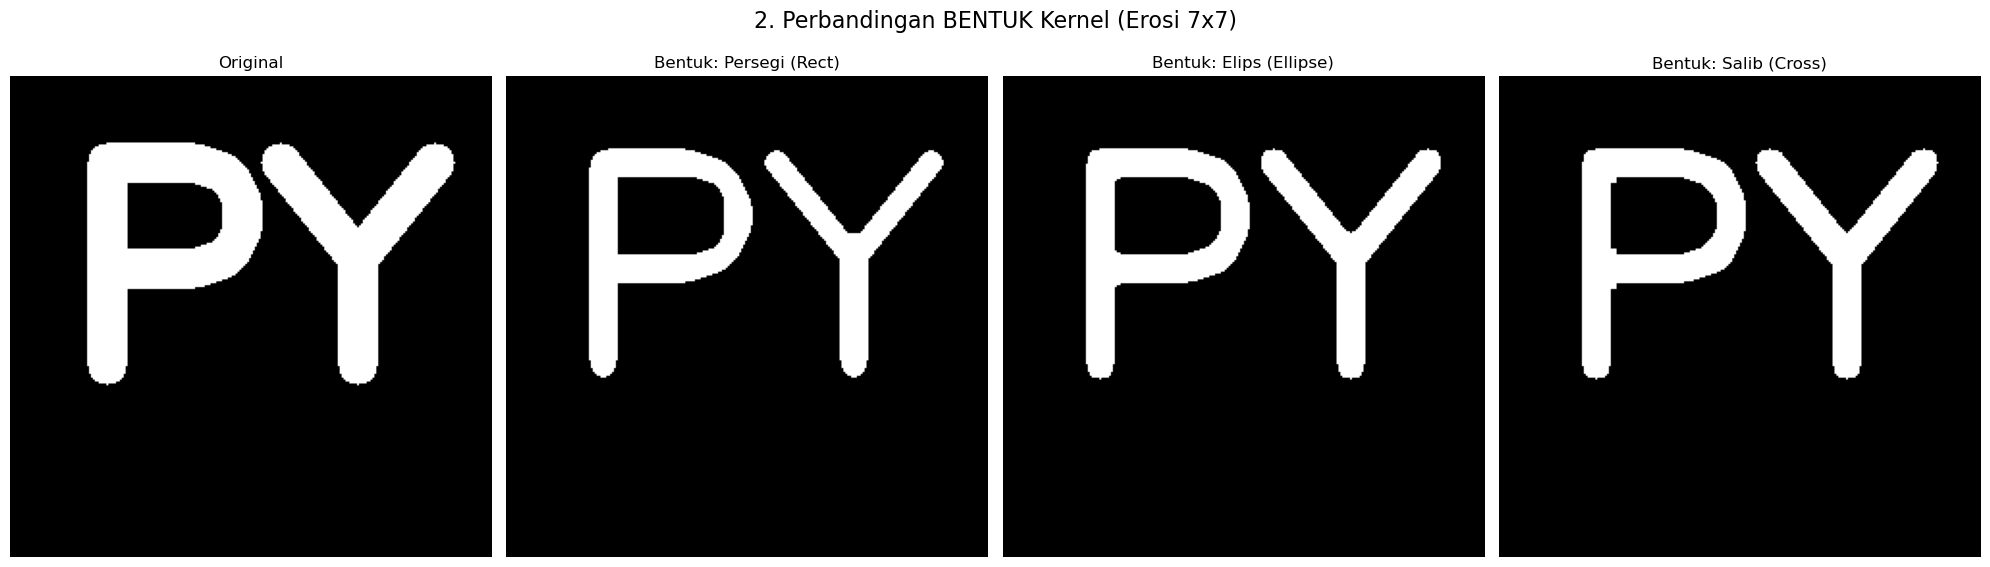

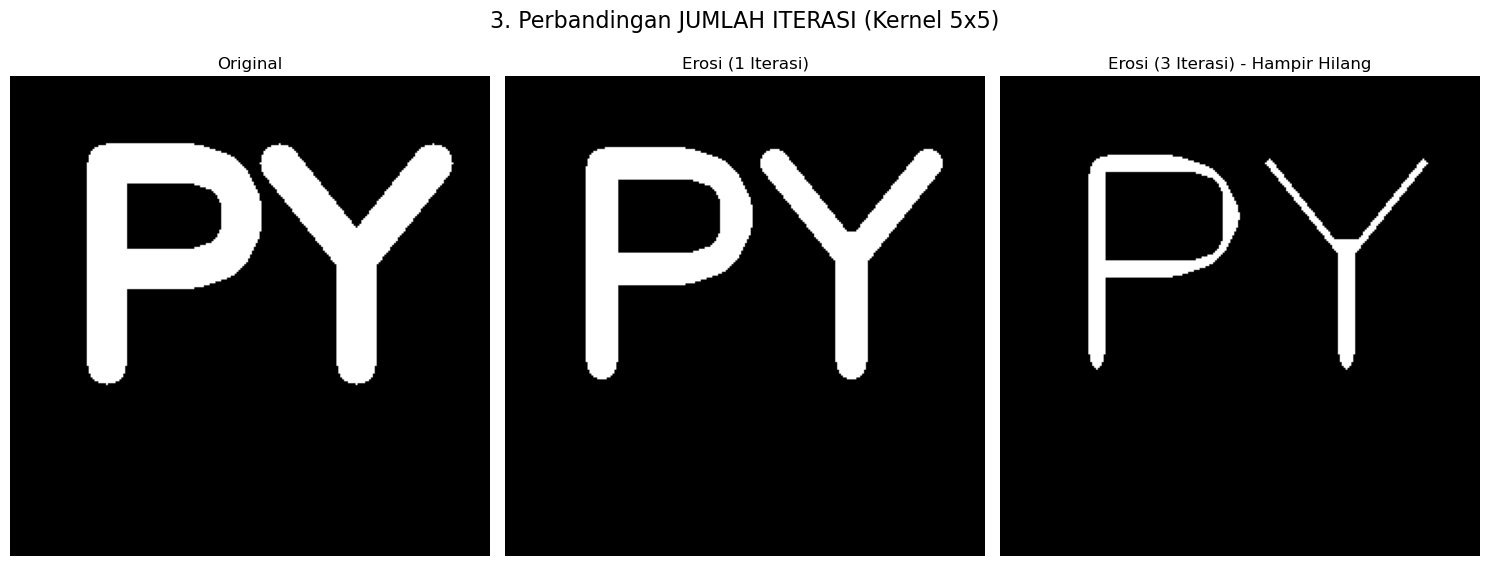

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = np.zeros((250, 250), dtype=np.uint8)

cv2.putText(img, "PY", (30, 150), cv2.FONT_HERSHEY_SIMPLEX, 5, (255), 20)

kernel_small = np.ones((3, 3), np.uint8)
erosion_small = cv2.erode(img, kernel_small, iterations=1)

kernel_large = np.ones((9, 9), np.uint8)
erosion_large = cv2.erode(img, kernel_large, iterations=1)

plt.figure(figsize=(15, 6))
plt.suptitle("1. Perbandingan UKURAN Kernel (Erosi)", fontsize=16)

plt.subplot(1, 3, 1)
plt.title("Original")
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Erosi (Kernel 3x3) - Tipis")
plt.imshow(erosion_small, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("Erosi (Kernel 9x9) - Sangat Tipis")
plt.imshow(erosion_large, cmap='gray')
plt.axis('off')

plt.tight_layout()

kernel_rect = cv2.getStructuringElement(cv2.MORPH_RECT, (7, 7))
erosion_rect = cv2.erode(img, kernel_rect, iterations=1)

kernel_ellipse = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7, 7))
erosion_ellipse = cv2.erode(img, kernel_ellipse, iterations=1)

kernel_cross = cv2.getStructuringElement(cv2.MORPH_CROSS, (7, 7))
erosion_cross = cv2.erode(img, kernel_cross, iterations=1)

plt.figure(figsize=(20, 6))
plt.suptitle("2. Perbandingan BENTUK Kernel (Erosi 7x7)", fontsize=16)

plt.subplot(1, 4, 1)
plt.title("Original")
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.title("Bentuk: Persegi (Rect)")
plt.imshow(erosion_rect, cmap='gray')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.title("Bentuk: Elips (Ellipse)")
plt.imshow(erosion_ellipse, cmap='gray')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.title("Bentuk: Salib (Cross)")
plt.imshow(erosion_cross, cmap='gray')
plt.axis('off')

plt.tight_layout()


kernel_5x5 = np.ones((5, 5), np.uint8)

erosion_1_iter = cv2.erode(img, kernel_5x5, iterations=1)

erosion_3_iter = cv2.erode(img, kernel_5x5, iterations=3)

plt.figure(figsize=(15, 6))
plt.suptitle("3. Perbandingan JUMLAH ITERASI (Kernel 5x5)", fontsize=16)

plt.subplot(1, 3, 1)
plt.title("Original")
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Erosi (1 Iterasi)")
plt.imshow(erosion_1_iter, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("Erosi (3 Iterasi) - Hampir Hilang")
plt.imshow(erosion_3_iter, cmap='gray')
plt.axis('off')

plt.tight_layout()

plt.show()

## Bagian 3: Operasi Morfologi Gabungan

### 3.1 Opening

**Teori:** Opening adalah **Erosi** diikuti oleh **Dilasi** (menggunakan SE yang sama).
* Rumus: $A \circ B = (A \ominus B) \oplus B$
* Kegunaan: Menghilangkan noise "salt" (titik putih kecil), memutus jembatan tipis (*isthmus*), dan menghaluskan kontur objek dari luar tanpa mengubah ukuran objek secara signifikan.

In [ ]:
# kodenya disini bisa tambah cell klo perlu

### 3.2 Closing

**Teori:** Closing adalah **Dilasi** diikuti oleh **Erosi** (menggunakan SE yang sama).
* Rumus: $A \bullet B = (A \oplus B) \ominus B$
* Kegunaan: Mengisi lubang-lubang kecil (*holes*) di dalam objek, menggabungkan celah sempit, dan menghaluskan kontur objek dari dalam.

In [ ]:
# kodenya disini bisa tambah cell klo perlu

## Bagian 4: Operasi Morfologi Lanjutan

### 4.1 Gradien Morfologi (Morphological Gradient)

**Teori:** Gradien adalah perbedaan antara **Dilasi** dan **Erosi** dari sebuah citra.
* Rumus: $G = (A \oplus B) - (A \ominus B)$
* Kegunaan: Menghasilkan "outline" atau batas dari objek. Berguna untuk deteksi tepi.

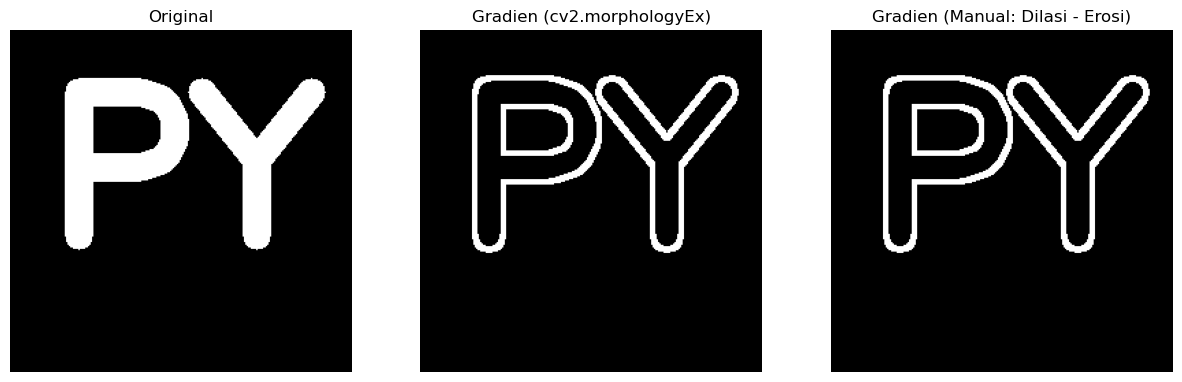

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = np.zeros((250, 250), dtype=np.uint8)
cv2.putText(img, "PY", (30, 150), cv2.FONT_HERSHEY_SIMPLEX, 5, (255), 20)

kernel = np.ones((5, 5), np.uint8)

img_gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)

img_dilation = cv2.dilate(img, kernel, iterations=1)
img_erosion = cv2.erode(img, kernel, iterations=1)
img_gradient_manual = cv2.subtract(img_dilation, img_erosion)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title("Original")
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Gradien (cv2.morphologyEx)")
plt.imshow(img_gradient, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("Gradien (Manual: Dilasi - Erosi)")
plt.imshow(img_gradient_manual, cmap='gray')
plt.axis('off')

plt.show()

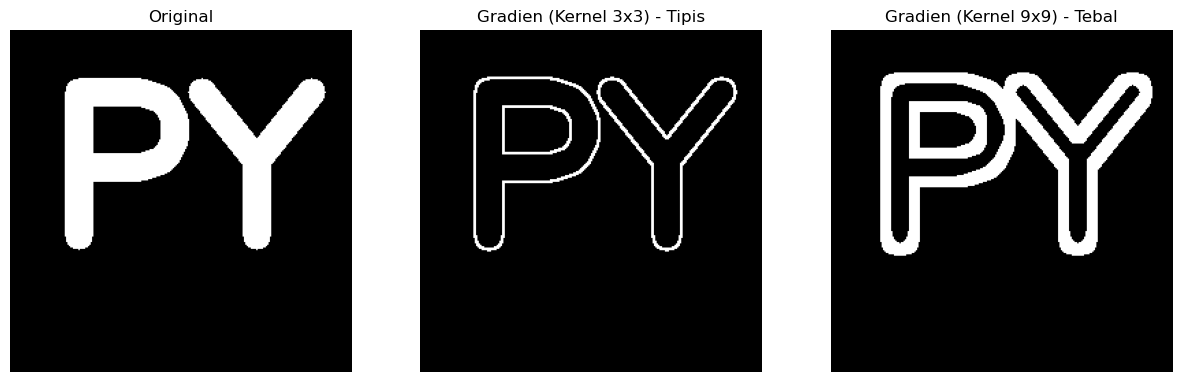

In [4]:
kernel_small = np.ones((3, 3), np.uint8)
gradient_small = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel_small)

kernel_large = np.ones((9, 9), np.uint8)
gradient_large = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel_large)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title("Original")
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Gradien (Kernel 3x3) - Tipis")
plt.imshow(gradient_small, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("Gradien (Kernel 9x9) - Tebal")
plt.imshow(gradient_large, cmap='gray')
plt.axis('off')

plt.show()

### 4.2 Top-Hat

**Teori:** Top-Hat adalah perbedaan antara citra asli dan hasil **Opening**-nya.
* Rumus: $T_{hat}(A) = A - (A \circ B)$
* Kegunaan: Sangat berguna pada citra grayscale untuk mendeteksi objek-objek kecil atau detail terang yang berada di atas latar belakang yang lebih gelap.

In [ ]:
# kodenya disini bisa tambah cell klo perlu

### 4.3 Black-Hat (atau Bottom-Hat)

**Teori:** Black-Hat adalah perbedaan antara hasil **Closing** dan citra aslinya.
* Rumus: $B_{hat}(A) = (A \bullet B) - A$
* Kegunaan: Kebalikan dari Top-Hat. Berguna untuk mendeteksi objek/detail kecil yang gelap di atas latar belakang yang lebih terang (misal: celah, goresan).

In [ ]:
# kodenya disini bisa tambah cell klo perlu

### 4.4 Ekstraksi Batas (Boundary Extraction)

**Teori:** Mirip dengan Gradien Morfologi, tetapi secara spesifik didefinisikan sebagai perbedaan antara citra asli dan hasil **Erosi**-nya.
* Rumus: $\beta(A) = A - (A \ominus B)$
* Kegunaan: Menghasilkan batas *internal* objek (tepi bagian dalam).

In [ ]:
# kodenya disini bisa tambah cell klo perlu

### 4.5 Pengisian Lubang (Hole Filling)

**Teori:** Ini adalah algoritma yang lebih kompleks, seringkali menggunakan rekonstruksi morfologi atau `floodFill`. Tujuannya adalah mengisi semua lubang (area background) yang sepenuhnya dikelilingi oleh foreground.

**Implementasi Sederhana (menggunakan `floodFill`):**
1.  Buat *inverted image* (latar belakang jadi objek, objek jadi lubang).
2.  Gunakan `floodFill` dari titik yang pasti background (misal: 0,0) pada *inverted image*.
3.  Area yang terisi adalah semua area background yang terhubung ke tepi.
4.  Area yang *tidak* terisi adalah lubang.
5.  Inversi kembali hasilnya.

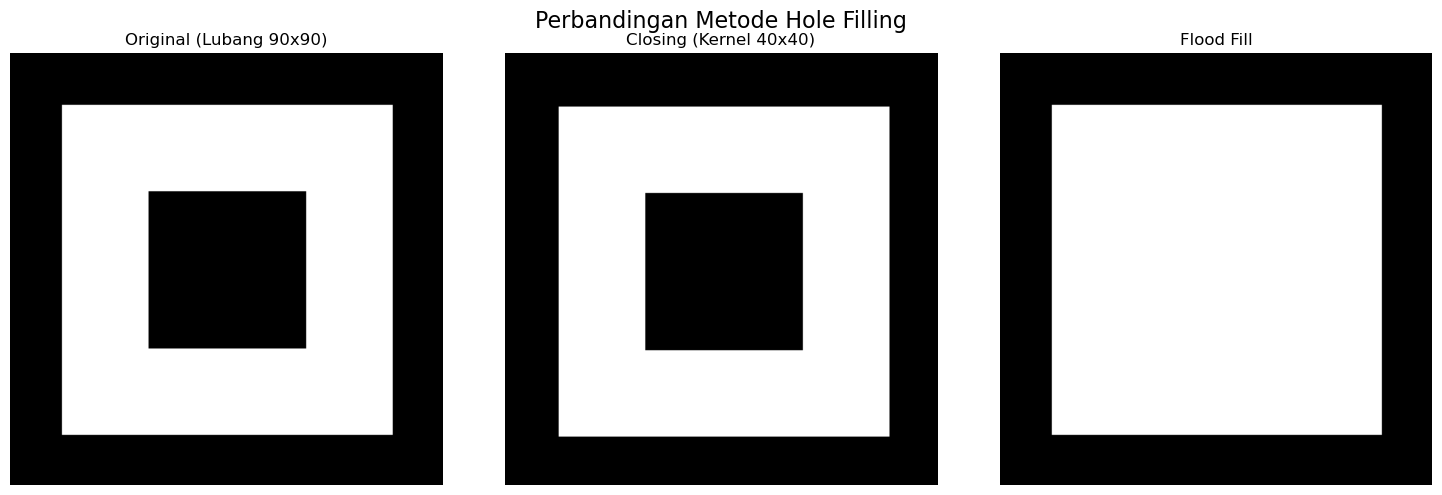

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = np.zeros((250, 250), dtype=np.uint8)
cv2.rectangle(img, (30, 30), (220, 220), 255, -1) 
cv2.rectangle(img, (80, 80), (170, 170), 0, -1) 
img_original = img.copy()

kernel_small = np.ones((40, 40), np.uint8)
img_closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel_small)

im_floodfill = img.copy()
h, w = img.shape[:2]
mask = np.zeros((h+2, w+2), np.uint8)
cv2.floodFill(im_floodfill, mask, (0,0), 255)
im_floodfill_inv = cv2.bitwise_not(im_floodfill)

img_filled = img_original | im_floodfill_inv

plt.figure(figsize=(15, 5))
plt.suptitle("Perbandingan Metode Hole Filling", fontsize=16)

plt.subplot(1, 3, 1)
plt.title("Original (Lubang 90x90)")
plt.imshow(img_original, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Closing (Kernel 40x40)")
plt.imshow(img_closing, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("Flood Fill")
plt.imshow(img_filled, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

### 4.6 Transformasi Hit-or-Miss

**Teori:** Transformasi Hit-or-Miss (HMT) adalah operasi fundamental yang digunakan untuk menemukan pola piksel tertentu dalam citra biner (deteksi pola). Operasi ini menggunakan *dua* kernel (atau satu kernel gabungan) yang melacak *foreground* dan *background* secara bersamaan.

* **Kernel "Hit" ($B_1$):** Bagian yang harus cocok dengan *foreground* (piksel bernilai 1/255).
* **Kernel "Miss" ($B_2$):** Bagian yang harus cocok dengan *background* (piksel bernilai 0).

Sebuah piksel di output akan bernilai 1 (putih) *hanya jika* kernel "Hit" TEPAT pas dengan foreground objek DAN kernel "Miss" TEPAT pas dengan background di sekitarnya. 

**Kegunaan:** Sangat spesifik untuk deteksi pola, seperti menemukan sudut, piksel terisolasi, atau titik akhir garis. Ini adalah dasar untuk operasi yang lebih kompleks seperti *Thinning* dan *Pruning*.

**Implementasi OpenCV:** Fungsi `cv2.morphologyEx` dengan `cv2.MORPH_HITMISS` menggunakan satu kernel di mana `1` berarti *foreground* (hit) dan `0` berarti *background* (miss).

In [ ]:
# kodenya disini bisa tambah cell klo perlu

### 4.7 Thinning (Penipisan)

**Teori:** Thinning adalah proses *iteratif* yang digunakan untuk mengikis piksel-piksel batas dari sebuah objek biner. Tujuannya adalah untuk mengurangi objek menjadi "rangka" (skeleton) setebal 1 piksel.

Proses ini penting karena:
1.  **Mempertahankan Konektivitas:** Objek yang awalnya terhubung tidak akan terputus.
2.  **Mempertahankan Titik Akhir:** Garis tidak akan terkikis dari ujungnya.

Implementasi standarnya menggunakan serangkaian operasi Hit-or-Miss yang diulang berkali-kali dengan 8 kernel berbeda (mewakili 8 arah) hingga tidak ada lagi piksel yang dapat dihapus (konvergen).

**Implementasi OpenCV:** Operasi ini tidak ada di modul OpenCV utama. Operasi ini ada di modul `ximgproc` (Extended Image Processing) yang harus diinstal terpisah.

In [ ]:
# kodenya disini bisa tambah cell klo perlu

### 4.8 Rekonstruksi Morfologi

**Teori:** Ini adalah konsep yang sangat kuat, bukan satu operasi tunggal. Rekonstruksi menggunakan dua citra:
1.  **Marker (Penanda):** Citra awal tempat proses dimulai.
2.  **Mask (Topeng):** Citra yang membatasi penyebaran proses.

Prosesnya (untuk rekonstruksi dengan dilasi):
1.  Mulai dengan citra "marker".
2.  Lakukan dilasi pada "marker" menggunakan SE (misal: 3x3).
3.  Hasil dilasi kemudian di-"klip" agar tidak melebihi "mask" (biasanya dengan operasi `bitwise_and` antara hasil dilasi dan mask).
4.  Ulangi langkah 2 dan 3, menggunakan hasil dari langkah 3 sebagai "marker" baru.
5.  Berhenti ketika "marker" tidak lagi berubah (konvergen).


**Kegunaan:** Sangat banyak. Contoh klasik: "membersihkan" objek yang menyentuh batas, atau mengisi lubang (versi yang lebih stabil daripada `floodFill`).

In [ ]:
# kodenya disini bisa tambah cell klo perlu